In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
star98_df = sm.datasets.star98.load_pandas().data

In [4]:
star98_df.columns

Index(['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
       'PERMINTE', 'AVYRSEXP', 'AVSALK', 'PERSPENK', 'PTRATIO', 'PCTAF',
       'PCTCHRT', 'PCTYRRND', 'PERMINTE_AVYRSEXP', 'PERMINTE_AVSAL',
       'AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO', 'PERSPEN_PCTAF', 'PTRATIO_PCTAF',
       'PERMINTE_AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO_PCTAF'],
      dtype='object')

In [5]:
selected_col_names = ['LOWINC', 'PERMINTE', 'PERHISP']

In [6]:
star98_df[selected_col_names].describe()

LOWINC    PERMINTE     PERHISP
count  303.000000  303.000000  303.000000
mean    41.409877   14.694747   34.398080
std     20.467312   12.307611   24.938683
min      0.000000    0.000000    2.251407
25%     26.683040    6.329114   13.919595
50%     40.236070   11.111110   27.583130
75%     55.460075   19.181675   47.617620
max     92.334500   80.174930   98.821000

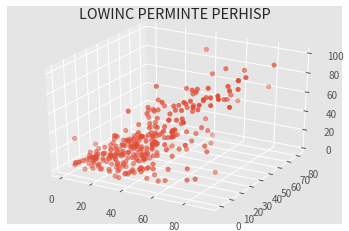

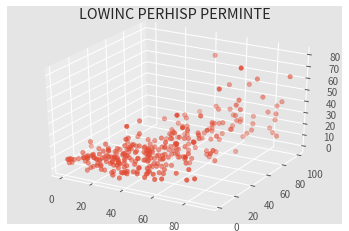

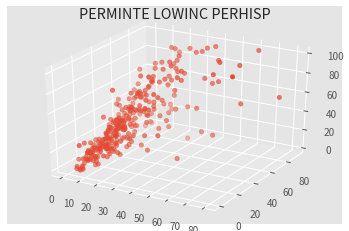

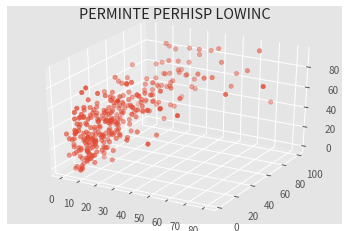

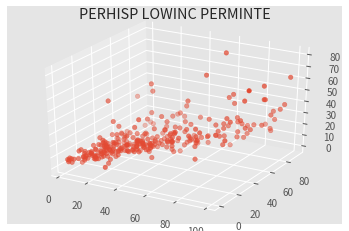

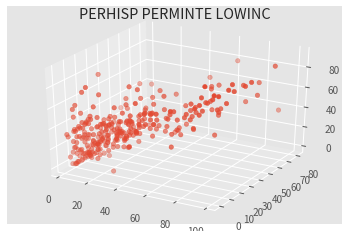

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations

for names in permutations(selected_col_names, 3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.title(' '.join(names))
    ax.scatter(*(star98_df[c] for c in names))

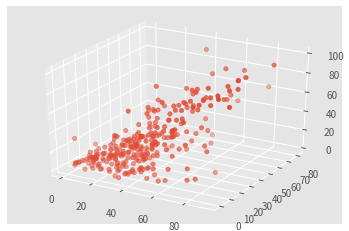

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*(star98_df[c] for c in selected_col_names))

In [9]:
X = star98_df[selected_col_names]

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [12]:
X_pca = pca.fit_transform(X)

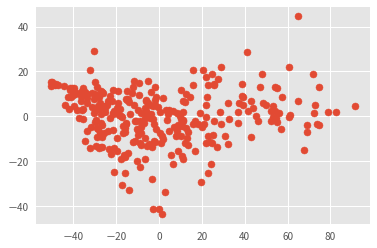

In [13]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1])

In [14]:
pca.components_

array([[ 0.57948251,  0.27180071,  0.76832571],
       [-0.81395942,  0.24028986,  0.52889587]])

In [15]:
from sklearn.decomposition import FactorAnalysis

In [16]:
fa = FactorAnalysis(n_components=2)

In [17]:
X_fa = fa.fit_transform(X)

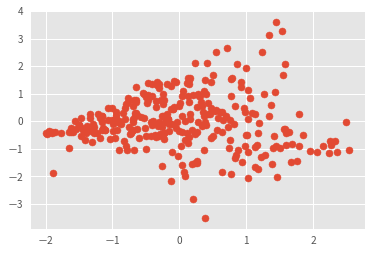

In [18]:
plt.scatter(X_fa[:, 0], X_fa[:, 1])

In [19]:
fa.components_

array([[ 20.35435982,   6.57186299,  19.17859603],
       [  1.44651394,  -4.24002038, -15.50657778]])

In [20]:
fa.noise_variance_

array([  1.13593464,  89.80136189,  11.6127895 ])

In [21]:
pca_comps_pd = pd.DataFrame(
    data=pca.components_,
    index=['comp_1', 'comp_2'],
    columns=['LOWINC', 'PERMINTE', 'PERHISP']
)
pca_comps_pd

LOWINC  PERMINTE   PERHISP
comp_1  0.579483  0.271801  0.768326
comp_2 -0.813959  0.240290  0.528896

In [22]:
pd = pca_comps_pd.reset_index().melt(id_vars='index')
pd

index  variable     value
0  comp_1    LOWINC  0.579483
1  comp_2    LOWINC -0.813959
2  comp_1  PERMINTE  0.271801
3  comp_2  PERMINTE  0.240290
4  comp_1   PERHISP  0.768326
5  comp_2   PERHISP  0.528896

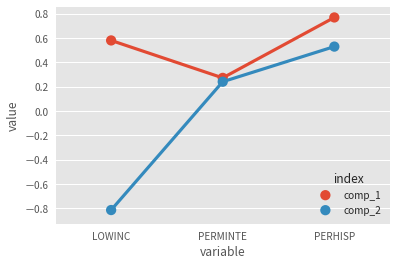

In [23]:
sns.pointplot(data=pd, x='variable', y='value', hue='index')